# Finetuning: Analyze baseline job using 65 sec inputs

This notebook will analyze the outputs of the finetuning job using a randomly initialized ResNet18. This job serves as the baseline to which we will compare the efficacy of pre-training on finetuning.

The notebook for the finetuning job can be found on [Github](https://github.com/myles-i/DLH_TransferLearning/blob/master/jupyter_notebooks/finetune_baseline_65sec.ipynb).



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [2]:
PROJECT_ROOT = '/content/drive/MyDrive/DLHProject'
JOB_DIR = PROJECT_ROOT + '/jobs/finetune_baseline_65sec'
! ls -lh $JOB_DIR

total 52M
-rw------- 1 root root  52M Apr 12 05:55 best_model.weights.data-00000-of-00001
-rw------- 1 root root  14K Apr 12 05:55 best_model.weights.index
-rw------- 1 root root   93 Apr 12 05:55 checkpoint
-rw------- 1 root root 7.1K Apr 12 05:42 history.csv
-rw------- 1 root root 4.6K Apr 12 06:11 history.npy
-rw------- 1 root root 107K Apr 12 06:12 test_predictions.csv
-rw------- 1 root root 399K Apr 12 06:12 train_predictions.csv
-rw------- 1 root root  27K Apr 12 06:12 val_predictions.csv


In [ ]:
%cd $JOB_DIR

In [4]:
import pandas as pd

history = pd.read_csv('history.csv')
history.head()

,epoch,acc,f1,loss,val_acc,val_loss
0,0,0.587490,0.308501,0.975869,0.622951,0.867372
1,1,0.652854,0.459062,0.816944,0.644028,0.933014
2,2,0.691321,0.586350,0.729423,0.711944,0.694799
3,3,0.724003,0.666203,0.658888,0.744731,0.704088
4,4,0.735887,0.625428,0.629763,0.679157,0.764776


We plot the macro F1 validation score over epoch using `matplotlib`. The output looks very much the same as what the authors used.

Note that we set up the plot so that it mostly has the same appearance as Figure 3 in the paper.

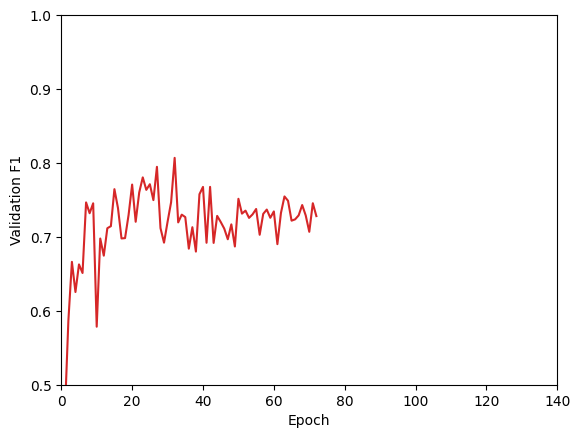

In [20]:
from matplotlib import pyplot as plt

_ = plt.plot(history['epoch'], history['f1'], color='tab:red')
_ = plt.xlabel('Epoch')
_ = plt.ylabel('Validation F1')
ax = plt.gca()
_ = ax.set_xlim([0, 140])
_ = ax.set_ylim([0.5, 1.0])
